In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
state_data=pd.read_csv("/content/drive/MyDrive/State_data.csv")
data=pd.read_csv("/content/drive/MyDrive/Data.csv")
ncap_fund=pd.read_csv("/content/drive/MyDrive/NCAP_Funding.csv")

#Spatial aggregation. [4 Marks]


Q1 Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [6]:
display(data.head())

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_cleaned = data.dropna(subset=["PM2.5", "state"])
avg_PM = data_cleaned.groupby('state')['PM2.5'].mean()

state_with_max_PM = avg_PM.idxmax()
max_value = avg_PM.max()
print(f"State with max PM2.5 is {state_with_max_PM} with a value of {max_value:.2f}")

State with max PM2.5 is Delhi with a value of 104.10


Q2 Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [8]:
data["Timestamp"] = pd.to_datetime(data['Timestamp'], errors='coerce')
hazardous_2023 = data[(data['Timestamp'].dt.year == 2023) & (data['PM2.5'] > 300)]

hazardous_days_per_state = hazardous_2023.groupby('state')['Timestamp'].nunique()
state_most_hazardous_days = hazardous_days_per_state.idxmax()

max_hazardous_days = hazardous_days_per_state.max()
print(f"The state with the most hazardous PM2.5 days in 2023 is {state_most_hazardous_days} with {max_hazardous_days} days.")

The state with the most hazardous PM2.5 days in 2023 is Delhi with 49 days.


Q3 Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [9]:
data["Timestamp"] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_2023 = data[(data['Timestamp'].dt.year == 2023)]
pm25_variability = data_2023.groupby('state')['PM2.5'].std()

highest_variability_state = pm25_variability.idxmax()
highest_variability_value = pm25_variability.max()
print(f"The state with the highest variability in PM2.5 levels in 2023 is {highest_variability_state} with a standard deviation of {highest_variability_value:.2f}")

The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.80


Q4 Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [10]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
covid_period_data = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]
covid_period_data = covid_period_data.dropna(subset=["PM2.5", "state"])

state_avg_pm25_covid_period = covid_period_data.groupby('state')['PM2.5'].mean()
lowest_pm25_state = state_avg_pm25_covid_period.idxmin()
lowest_pm25_value = state_avg_pm25_covid_period.min()
print(f"The state with the lowest average PM2.5 levels during the COVID period (2020-2021) is {lowest_pm25_state} with an average of {lowest_pm25_value:.2f} µg/m³.")

The state with the lowest average PM2.5 levels during the COVID period (2020-2021) is Mizoram with an average of 14.32 µg/m³.


#Temporal Aggregation [3 Marks]

Q1 Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [11]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data_aug_2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]

max_pm25_row = data_aug_2020.loc[data_aug_2020["PM2.5"].idxmax(), ["station", "PM2.5"]]
print(f"The station that recorded the highest PM 2.5 value in August 2020 was {max_pm25_row['station']}, with a PM 2.5 value of {max_pm25_row['PM2.5']}")

The station that recorded the highest PM 2.5 value in August 2020 was Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB, with a PM 2.5 value of 805.51


Q2 For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [12]:
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2018 = data[(data["Timestamp"].dt.year == 2018) & (data["station"] == station_name)]

df_2018 = df_2018.dropna(subset=["PM2.5"])

seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9] }
seasonal_avg = {}
for season, months in seasons.items():
    avg_pm25 = df_2018[df_2018["Timestamp"].dt.month.isin(months)]["PM2.5"].mean()
    seasonal_avg[season] = avg_pm25 if pd.notna(avg_pm25) else 0

mk = None
mv = float('-inf')
for k, v in seasonal_avg.items():
    if v > mv:
        mv = v
        mk = k
most_polluted_season=mk
print("Average PM2.5 concentration by season (2018):")
for season, avg in seasonal_avg.items():
    print(f"{season}: {avg:.2f}")

print(f"\nThe most polluted season in 2018 was: {most_polluted_season}")

Average PM2.5 concentration by season (2018):
Winter: 67.49
Summer: 0.00
Monsoon: 34.43

The most polluted season in 2018 was: Winter


[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

Ans - Reasons why winter is most polluted :

*   Lower temperatures and temperature inversions trap pollutants close to the ground.

*   Increased use of heating and biomass burning adds to pollution.
*   Increased use of heating and biomass burning adds to pollution.
Calm winds lead to stagnation of air.

Q3 Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

a)Calculate the monthly average PM2.5 for weekdays and weekends separately

b)X-axis: Months (January to December).

c)Y-axis: Average PM2.5 levels.

d)Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

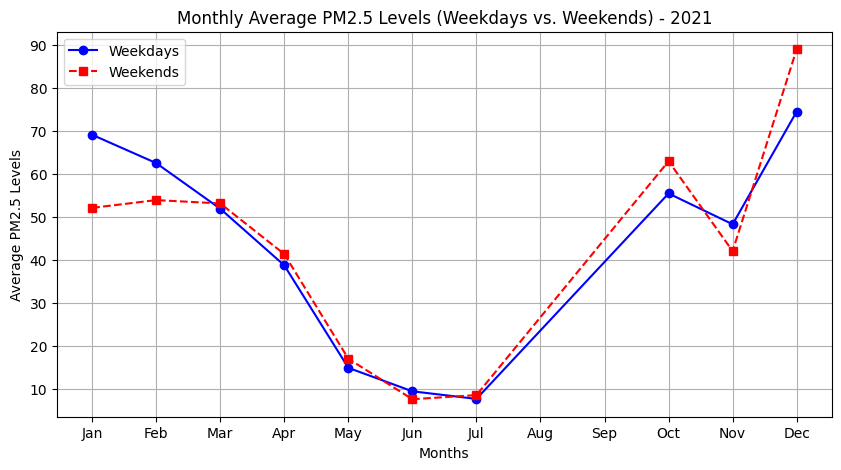

In [13]:
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2021 = data[(data["Timestamp"].dt.year == 2021) & (data["station"] == station_name)]
df_2021 = df_2021.dropna(subset=["PM2.5"])

df_2021["Weekday"] = df_2021["Timestamp"].dt.weekday
df_2021["Is_Weekend"] = df_2021["Weekday"] >= 5
monthly_avg = df_2021.groupby([df_2021["Timestamp"].dt.month, "Is_Weekend"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker="o", linestyle="-", label="Weekdays", color="b")
plt.plot(monthly_avg.index, monthly_avg[True], marker="s", linestyle="--", label="Weekends", color="r")

plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs. Weekends) - 2021")

plt.legend()
plt.grid(True)
plt.show()

#Spatio-temporal aggregation [3 marks]

Q1 For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [14]:
df_2022 = data[data["Timestamp"].dt.year == 2022]
df_2022 = df_2022.dropna(subset=["PM2.5", "state"])

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]
summer_avg = df_2022[df_2022["Timestamp"].dt.month.isin(summer_months)].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Timestamp"].dt.month.isin(monsoon_months)].groupby("state")["PM2.5"].mean()

percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
state_most_change = percentage_change.abs().idxmax()
max_change_value = percentage_change[state_most_change]
print(f"State with the most change: {state_most_change} ({max_change_value:.2f}%)")

State with the most change: Assam (-61.18%)


Q2 Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

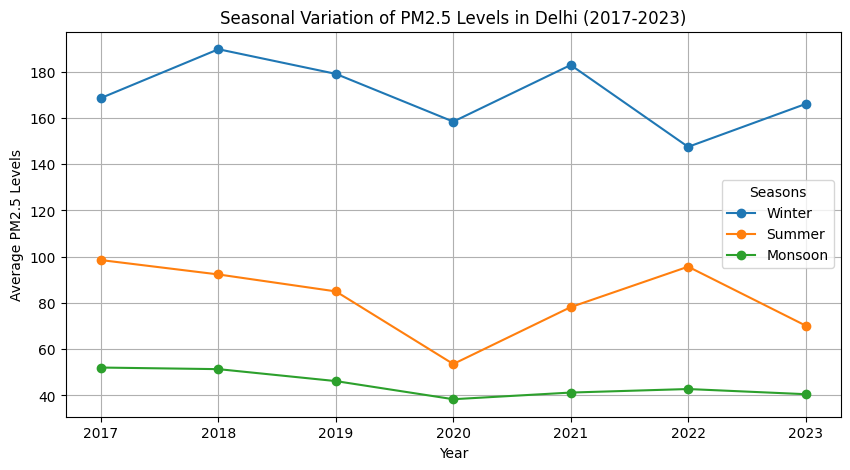

In [15]:
df_delhi = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year.between(2017, 2023))]
df_delhi = df_delhi.dropna(subset=["PM2.5"])

season_mapping = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9] }
def get_season(month):
    for season, months in season_mapping.items():
        if month in months:
            return season

df_delhi["Season"] = df_delhi["Timestamp"].dt.month.apply(get_season)
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
seasonal_avg_pm25 = df_delhi.groupby(["Year", "Season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
for season in ["Winter", "Summer", "Monsoon"]:
    plt.plot(seasonal_avg_pm25.index, seasonal_avg_pm25[season], marker="o", linestyle="-", label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")

plt.legend(title="Seasons")
plt.grid(True)
plt.show()

Q3 Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

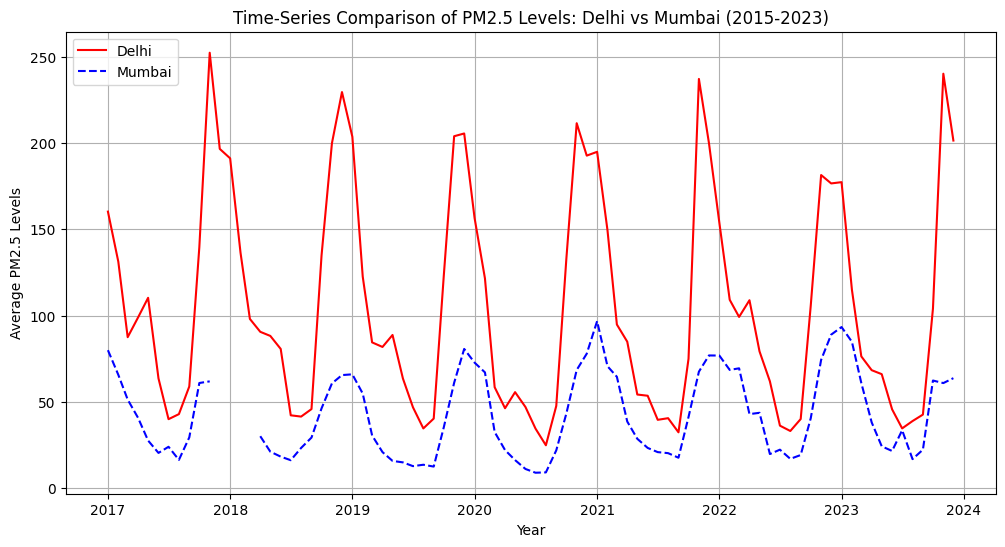

Fluctuation (Standard Deviation) - Delhi: 84.93
Fluctuation (Standard Deviation) - Mumbai: 40.18
The city with more fluctuations in PM2.5 levels is Delhi


In [16]:
df_cities = data[(data["city"].isin(["Delhi", "Mumbai"])) & (data["Timestamp"].dt.year.between(2015, 2023))]
df_cities = df_cities.dropna(subset=["PM2.5"])
df_cities["Year-Month"] = df_cities["Timestamp"].dt.to_period("M")

monthly_avg_pm25 = df_cities.groupby(["Year-Month", "city"])["PM2.5"].mean().unstack()
monthly_avg_pm25.index = monthly_avg_pm25.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Delhi"], label="Delhi", color="red", linestyle="-")
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Mumbai"], label="Mumbai", color="blue", linestyle="--")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Time-Series Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)")

plt.legend()
plt.grid(True)
plt.show()

delhi_fluctuation = df_cities[df_cities['city']=="Delhi"]['PM2.5'].std()
mumbai_fluctuation = df_cities[df_cities['city']=="Mumbai"]['PM2.5'].std()

print(f"Fluctuation (Standard Deviation) - Delhi: {delhi_fluctuation:.2f}")
print(f"Fluctuation (Standard Deviation) - Mumbai: {mumbai_fluctuation:.2f}")

more_fluctuating_city = "Delhi" if delhi_fluctuation > mumbai_fluctuation else "Mumbai"

print(f"The city with more fluctuations in PM2.5 levels is {more_fluctuating_city}")

#Population-Based [3 Marks]

Q1 Which state in India has the highest number of monitoring stations relative to its population?

In [17]:
df_air_quality = pd.read_csv("/content/drive/MyDrive/Data.csv")
df_population = pd.read_csv("/content/drive/MyDrive/State_data.csv")

df_population.rename(columns={"State": "state", "Population": "population"}, inplace=True)
df_population["state"] = df_population["state"].str.lower()
df_air_quality["state"] = df_air_quality["state"].str.lower()

stations_per_state = df_air_quality.groupby("state")["station"].nunique().reset_index()
stations_per_state.rename(columns={"station": "num_stations"}, inplace=True)

df_merged = stations_per_state.merge(df_population, on="state", how="inner")
df_merged["stations_per_million"] = df_merged["num_stations"] / (df_merged["population"] / 1000000)

highest_ratio_state = df_merged.loc[df_merged["stations_per_million"].idxmax()]
print("State with the highest number of monitoring stations relative to population:")
print(highest_ratio_state)

State with the highest number of monitoring stations relative to population:
state                   chandigarh
num_stations                     3
population                 1055450
Area (km2)                     114
stations_per_million       2.84239
Name: 4, dtype: object


Q2 Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

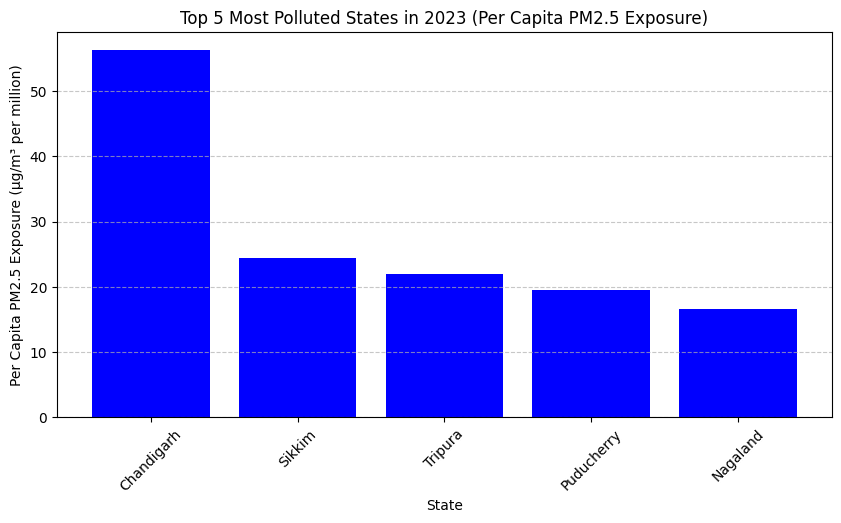

In [18]:
data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")
state_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')
data_2023 = data_df[data_df["Timestamp"].dt.year == 2023]
data_2023_cleaned = data_2023.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = data_2023_cleaned.groupby("state")["PM2.5"].mean().reset_index()
merged_df = pd.merge(state_avg_pm25, state_df, on="state")
merged_df["pm25_per_million"] = merged_df["PM2.5"] / (merged_df["population"] / 1000000)
top_5_polluted = merged_df.nlargest(5, "pm25_per_million")

plt.figure(figsize=(10, 5))
plt.bar(top_5_polluted["state"], top_5_polluted["pm25_per_million"], color='b')

plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure (µg/m³ per million)")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)")
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q3 Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

a) X-axis: Population density (people per square kilometer).

b) Y-axis: Average PM2.5 concentration.

c) Use a scatter plot to show the relationship, where each point represents a state.

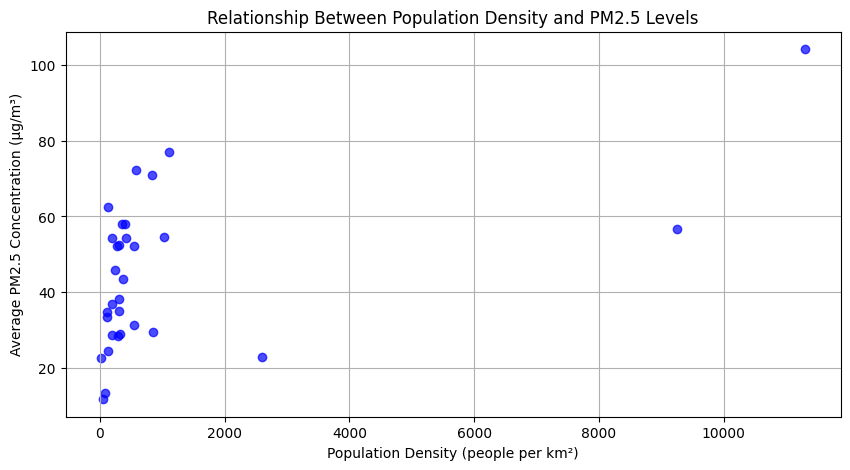

In [19]:
data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")
state_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors='coerce')
data_cleaned = data_df.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = data_cleaned.groupby("state")["PM2.5"].mean().reset_index()
state_df["population_density"] = state_df["population"] / state_df["Area (km2)"]
merged_df = pd.merge(state_avg_pm25, state_df, on="state")

plt.figure(figsize=(10, 5))
plt.scatter(merged_df["population_density"], merged_df["PM2.5"], color='blue', alpha=0.7)

plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Levels")

plt.grid()
plt.show()

#Area Based [3 Marks]

Q1 Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

a)X-axis: States.

b)Y-axis: PM2.5 concentration per square kilometer.

c)Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


State with the highest PM2.5 concentration per square kilometer: Chandigarh


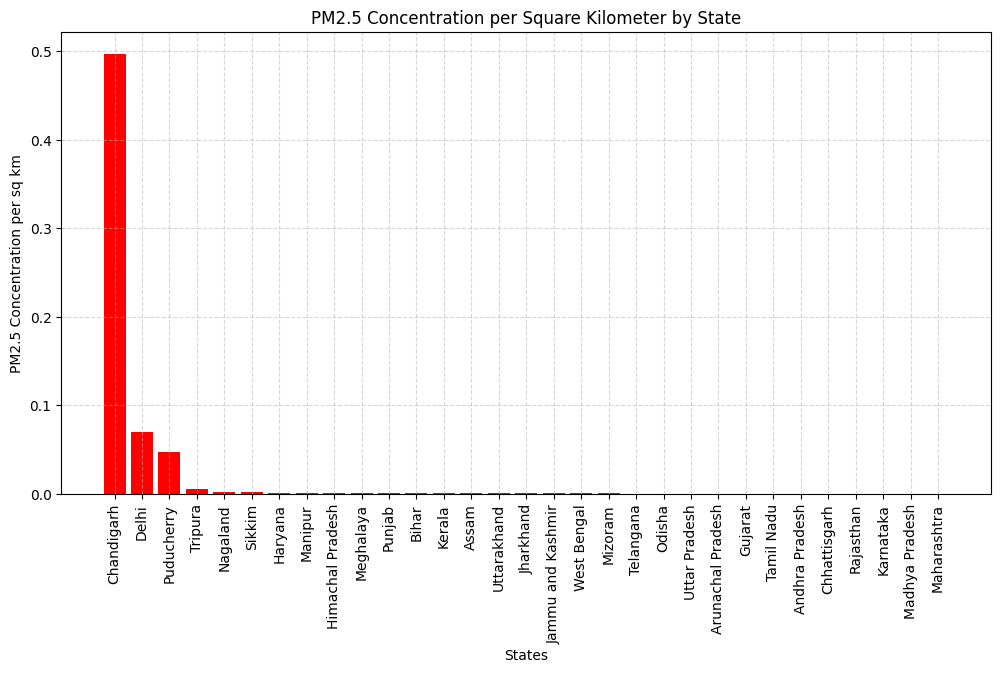

In [20]:
data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")
state_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
df_pollution_clean = data_df.dropna(subset=["PM2.5"])

pm25_avg_per_state = df_pollution_clean.groupby("state")["PM2.5"].mean().reset_index()
df_merged = pd.merge(pm25_avg_per_state,state_df, on='state')
df_merged["PM2.5 per sq km"] = df_merged["PM2.5"] / df_merged["Area (km2)"]
df_merged_sorted = df_merged.sort_values(by="PM2.5 per sq km", ascending=False)

most_polluted_state = df_merged_sorted.iloc[0]["state"]

print(f"State with the highest PM2.5 concentration per square kilometer: {most_polluted_state}")

plt.figure(figsize=(12, 6))
plt.bar(df_merged_sorted["state"], df_merged_sorted["PM2.5 per sq km"], color='red')

plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer by State")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Q2 Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


State with the highest density of monitoring stations: Delhi


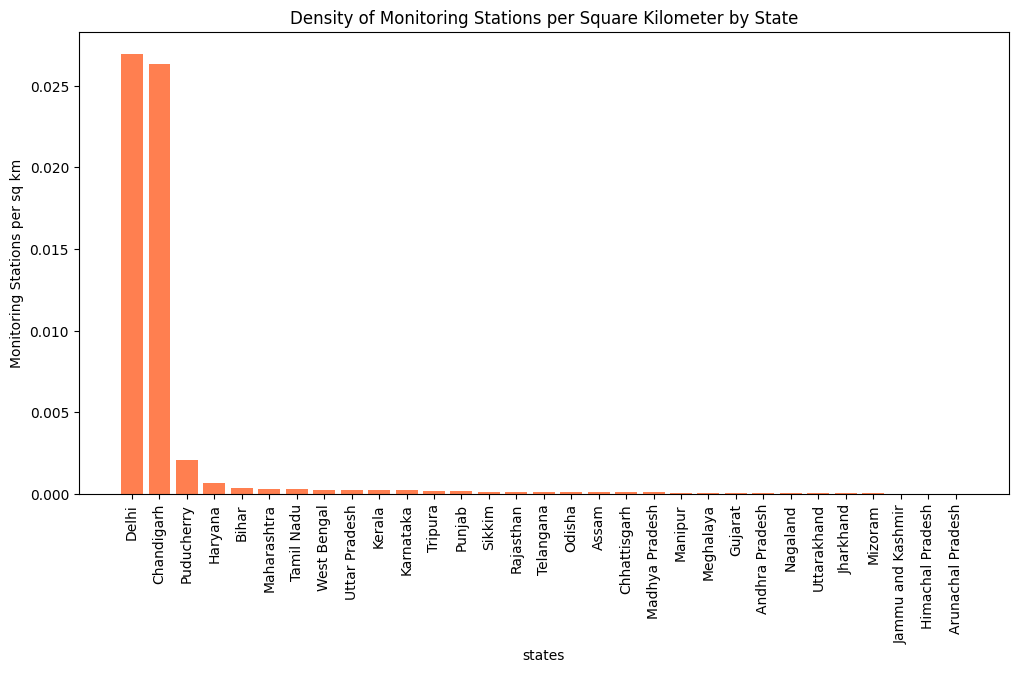

In [21]:
data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")
state_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")

state_df.rename(columns={"State": "state", "Population": "population"}, inplace=True)
station_count_per_state = data_df.groupby("state")["station"].nunique().reset_index()
station_count_per_state.rename(columns={"station": "Number of Stations"}, inplace=True)

df_station_density = pd.merge(station_count_per_state,state_df,on="state")
df_station_density["Stations per sq km"] = df_station_density["Number of Stations"] / df_station_density["Area (km2)"]
df_station_density_sorted = df_station_density.sort_values(by="Stations per sq km", ascending=False)
most_dense_state = df_station_density_sorted.iloc[0]["state"]

print(f"State with the highest density of monitoring stations: {most_dense_state}")

plt.figure(figsize=(12, 6))
plt.bar(df_station_density_sorted["state"], df_station_density_sorted["Stations per sq km"], color='coral')

plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("Monitoring Stations per sq km")
plt.title("Density of Monitoring Stations per Square Kilometer by State")

plt.show()

Q3 Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

            State  Population  Area (km2)  Population Density      PM2.5
0     Maharashtra   112374333      307713          365.192023  46.440044
1  Madhya Pradesh    72626809      308252          235.608557  47.095952


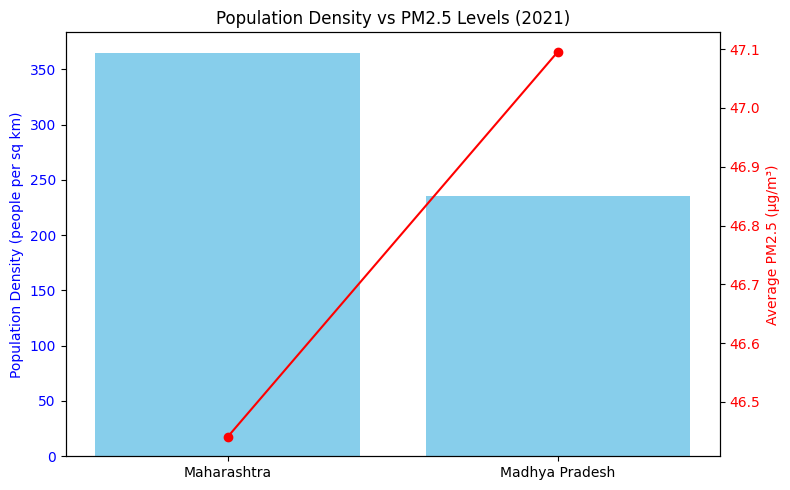

In [22]:
df_states = pd.read_csv("/content/drive/MyDrive/State_data.csv")
df_pollution = pd.read_csv("/content/drive/MyDrive/Data.csv")

df_pollution["Timestamp"] = pd.to_datetime(df_pollution["Timestamp"], errors='coerce')
df_2021 = df_pollution[(df_pollution["Timestamp"].dt.year == 2021) &
                       (df_pollution["state"].isin(["Maharashtra", "Madhya Pradesh"]))]

pm25_avg = df_2021.groupby("state")["PM2.5"].mean().reset_index()
pop_area_data = df_states[df_states["State"].isin(["Maharashtra", "Madhya Pradesh"])][["State", "Population", "Area (km2)"]]
pop_area_data["Population Density"] = pop_area_data["Population"] / pop_area_data["Area (km2)"]
analysis_df = pop_area_data.merge(pm25_avg, left_on="State", right_on="state").drop(columns=["state"])

print(analysis_df)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(analysis_df["State"], analysis_df["Population Density"], color='skyblue', label="Population Density")
ax1.set_ylabel("Population Density (people per sq km)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(analysis_df["State"], analysis_df["PM2.5"], color='red', marker='o', linestyle='-', label="PM2.5 Levels")
ax2.set_ylabel("Average PM2.5 (µg/m³)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Population Density vs PM2.5 Levels (2021)")
fig.tight_layout()
plt.show()

#Funding Based [3 Marks]

Q1 Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

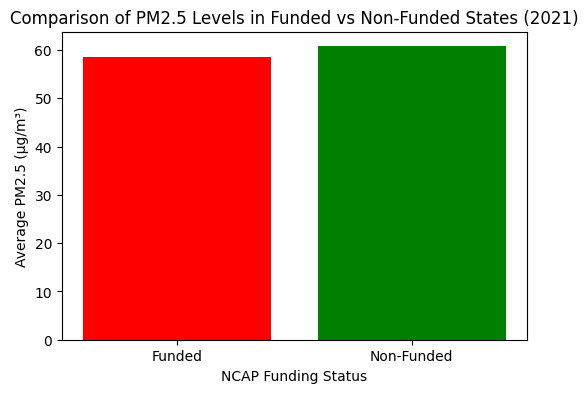

In [23]:
state_data_path = "/content/drive/MyDrive/State_data.csv"
pollution_data_path = "/content/drive/MyDrive/Data.csv"
ncap_data_path = "/content/drive/MyDrive/NCAP_Funding.csv"

df_states = pd.read_csv(state_data_path)
df_pollution = pd.read_csv(pollution_data_path)
df_ncap = pd.read_csv(ncap_data_path)

df_pollution["Timestamp"] = pd.to_datetime(df_pollution["Timestamp"], errors='coerce')
df_ncap["Total fund released"] = pd.to_numeric(df_ncap["Total fund released"], errors='coerce')

funded_states = df_ncap[df_ncap["Total fund released"] > 0]["State"].unique()
df_states["NCAP_Funded"] = df_states["State"].apply(lambda x: "Funded" if x in funded_states else "Non-Funded")
df_2021 = df_pollution[df_pollution["Timestamp"].dt.year == 2021]
df_2021 = df_2021.dropna(subset=["PM2.5", "state"])
pm25_funding_comparison = df_pollution.merge(df_states[["State", "NCAP_Funded"]],left_on="state", right_on="State", how="left")
pm25_comparison = pm25_funding_comparison.groupby("NCAP_Funded")["PM2.5"].mean()

plt.figure(figsize=(6, 4))
plt.bar(pm25_comparison.index, pm25_comparison.values, color=['red', 'green'])

plt.xlabel("NCAP Funding Status")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Comparison of PM2.5 Levels in Funded vs Non-Funded States (2021)")

plt.show()


Q2 Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

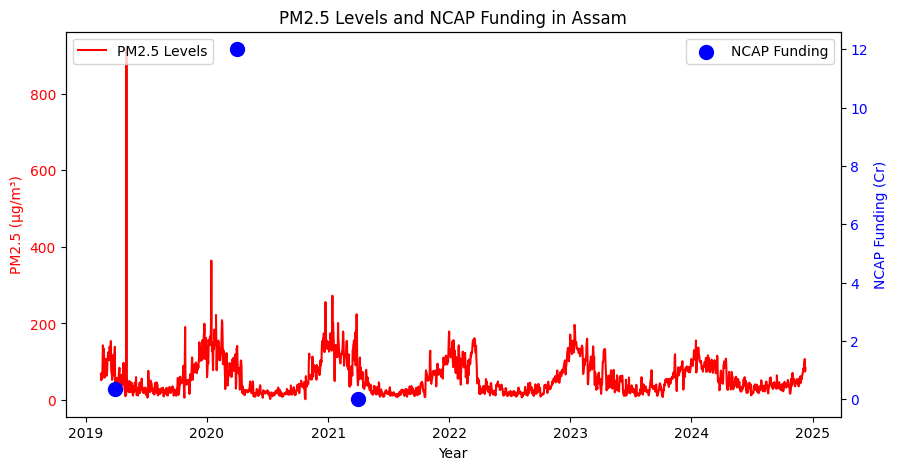

In [24]:
data_path = "/content/drive/MyDrive/Data.csv"
ncap_path = "/content/drive/MyDrive/NCAP_Funding.csv"

pm25_data = pd.read_csv(data_path)
funding_data = pd.read_csv(ncap_path)

assam_pm25_data = pm25_data[pm25_data["state"] == "Assam"].copy()
assam_pm25_data["Timestamp"] = pd.to_datetime(assam_pm25_data["Timestamp"])
assam_pm25_trend = assam_pm25_data.groupby("Timestamp")["PM2.5"].mean().reset_index()
assam_funding_data = funding_data[funding_data["State"] == "Assam"].copy()

funding_columns = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22",
    "Total fund released",
]

for col in funding_columns:
    assam_funding_data[col] = pd.to_numeric(assam_funding_data[col], errors="coerce")

assam_funding_summary = assam_funding_data[funding_columns].sum().reset_index()
assam_funding_summary.columns = ["Year", "Funding Amount"]

year_mapping = {
    "Amount released during FY 2019-20": "2019-04-01",
    "Amount released during FY 2020-21": "2020-04-01",
    "Amount released during FY 2021-22": "2021-04-01",
}

assam_funding_summary["Year"] = assam_funding_summary["Year"].map(year_mapping)
assam_funding_summary.dropna(inplace=True)
assam_funding_summary["Year"] = pd.to_datetime(assam_funding_summary["Year"])

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(assam_pm25_trend["Timestamp"], assam_pm25_trend["PM2.5"], color="red", label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.scatter(assam_funding_summary["Year"], assam_funding_summary["Funding Amount"], color="blue", label="NCAP Funding", marker="o", s=100)
ax2.set_ylabel("NCAP Funding (Cr)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels and NCAP Funding in Assam")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Q3 Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

<ipython-input-25-cf80a504d3f0>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(merged_data))


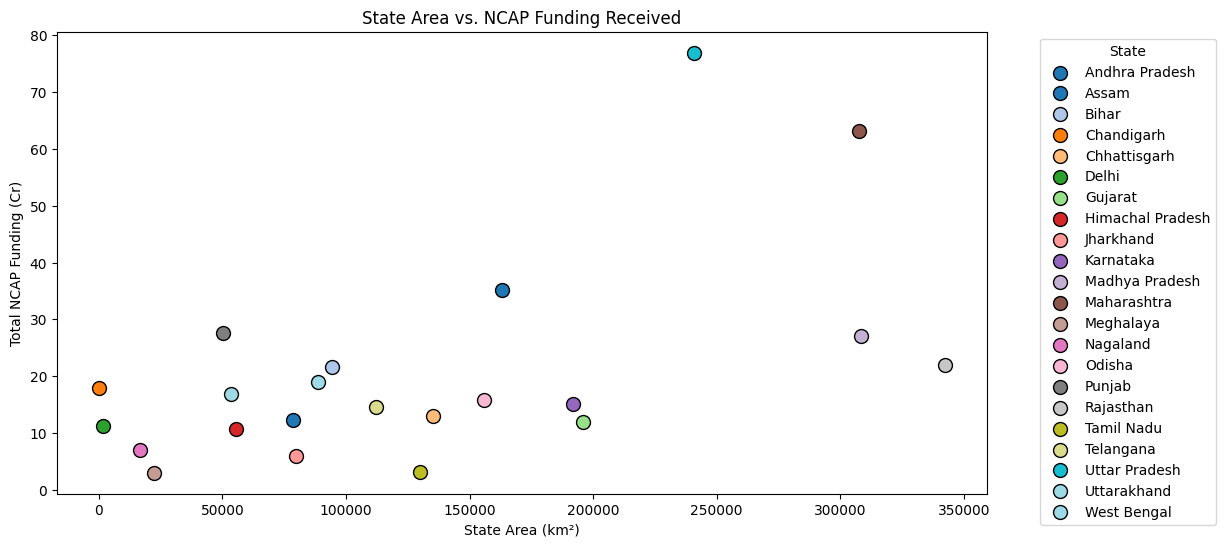

In [25]:
funding_file = "/content/drive/MyDrive/NCAP_Funding.csv"
state_data_file = "/content/drive/MyDrive/State_data.csv"

funding_data = pd.read_csv(funding_file)
state_data = pd.read_csv(state_data_file)

funding_data["Total fund released"] = pd.to_numeric(funding_data["Total fund released"], errors="coerce")
funding_by_state = funding_data.groupby("State")["Total fund released"].sum().reset_index()
merged_data = pd.merge(funding_by_state, state_data, on="State", how="inner")

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.get_cmap("tab20", len(merged_data))

for i, row in merged_data.iterrows():
    ax.scatter(row["Area (km2)"], row["Total fund released"], color=colors(i), label=row["State"], s=100, edgecolor="black")

ax.set_xlabel("State Area (km²)")
ax.set_ylabel("Total NCAP Funding (Cr)")
ax.set_title("State Area vs. NCAP Funding Received")
ax.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

#Miscellaneous Questions [5 Marks]

Q1 For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [26]:
pm25_file = "/content/drive/MyDrive/Data.csv"
pm25_data = pd.read_csv(pm25_file)

pm25_data["Timestamp"] = pd.to_datetime(pm25_data["Timestamp"])
pm25_2023 = pm25_data[pm25_data["Timestamp"].dt.year == 2023]
pm25_2023 = pm25_2023.dropna(subset=["PM2.5", "city"])

city_avg_pm25 = pm25_2023.groupby("city")["PM2.5"].mean()
most_polluted_city = city_avg_pm25.idxmax()

city_data = pm25_2023[pm25_2023["city"] == most_polluted_city]
total_days = city_data["Timestamp"].dt.date.nunique()
hazardous_days = city_data[city_data["PM2.5"] > 300]["Timestamp"].nunique()

hazardous_days_percentage = (hazardous_days / total_days) * 100
print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of hazardous days (>300 µg/m³): {hazardous_days_percentage:.2f}%")


Most polluted city in 2023: Darbhanga
Percentage of hazardous days (>300 µg/m³): 23.08%


Q2 Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

<ipython-input-27-0a05d3031d87>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike_data["Year"] = spike_data["Year"].astype(int)
<ipython-input-27-0a05d3031d87>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike_data["Month"] = spike_data["Month"].astype(int)
<ipython-input-27-0a05d3031d87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

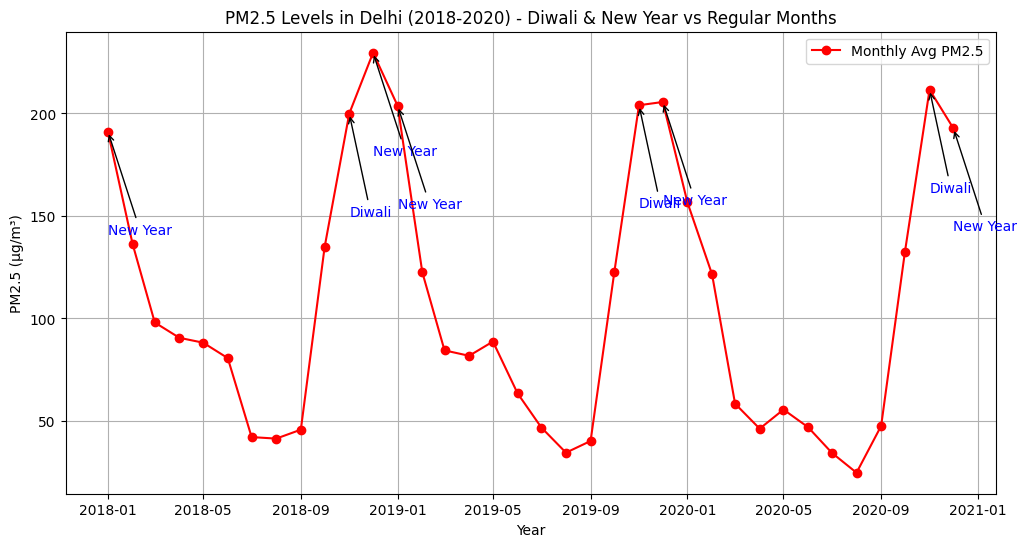

In [27]:
pm25_file = "/content/drive/MyDrive/Data.csv"
pm25_data = pd.read_csv(pm25_file)

pm25_data["Timestamp"] = pd.to_datetime(pm25_data["Timestamp"])
delhi_data = pm25_data[pm25_data["city"] == "Delhi"].copy()
delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
delhi_2018_2020 = delhi_data[(delhi_data["Year"] >= 2018) & (delhi_data["Year"] <= 2020)]

diwali_months = [10, 11]
new_year_months = [12, 1]
monthly_avg_pm25 = delhi_2018_2020.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()

spike_threshold = monthly_avg_pm25["PM2.5"].mean() + monthly_avg_pm25["PM2.5"].std()  # Threshold for spikes
spike_data = monthly_avg_pm25[(monthly_avg_pm25["PM2.5"] > spike_threshold) &
                              (monthly_avg_pm25["Month"].isin(diwali_months + new_year_months))]

monthly_avg_pm25["Year"] = monthly_avg_pm25["Year"].astype(int)
monthly_avg_pm25["Month"] = monthly_avg_pm25["Month"].astype(int)
monthly_avg_pm25["Date"] = pd.to_datetime(monthly_avg_pm25["Year"].astype(str) + "-" + monthly_avg_pm25["Month"].astype(str) + "-01")

spike_data["Year"] = spike_data["Year"].astype(int)
spike_data["Month"] = spike_data["Month"].astype(int)
spike_data["Date"] = pd.to_datetime(spike_data["Year"].astype(str) + "-" + spike_data["Month"].astype(str) + "-01")
spike_data["Festival"] = spike_data["Month"].apply(lambda x: "Diwali" if x in diwali_months else "New Year")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_avg_pm25["Date"], monthly_avg_pm25["PM2.5"], marker="o", linestyle="-", color="red", label="Monthly Avg PM2.5")

for _, row in spike_data.iterrows():
    label_offset = 50 if row["Festival"] == "Diwali Spike" else -50
    ax.annotate(row["Festival"], xy=(row["Date"], row["PM2.5"]),
                xytext=(row["Date"], row["PM2.5"] + label_offset),
                arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10, color="blue")

ax.set_xlabel("Year")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.set_title("PM2.5 Levels in Delhi (2018-2020) - Diwali & New Year vs Regular Months")

ax.legend()
plt.grid()
plt.show()


Q3 Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

Highest Funded State: Andhra Pradesh


<ipython-input-28-af4f8302a17e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pollution_df["Year"] = state_pollution_df["Timestamp"].dt.year


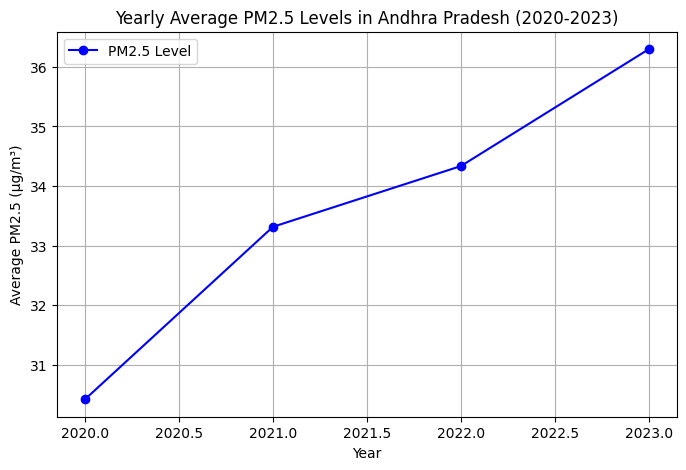

Year
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
Name: PM2.5, dtype: float64


In [28]:
ncap_funding_df = pd.read_csv("/content/drive/MyDrive/NCAP_Funding.csv")

ncap_funding_df["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding_df["Amount released during FY 2020-21"].replace("-", "0"), errors="coerce")
state_funding_2020 = ncap_funding_df.groupby("State")["Amount released during FY 2020-21"].sum()
highest_funded_state = state_funding_2020.idxmax()

air_pollution_df = pd.read_csv("/content/drive/MyDrive/Data.csv")
air_pollution_df["Timestamp"] = pd.to_datetime(air_pollution_df["Timestamp"], format="%Y-%m-%d", errors="coerce")
state_pollution_df = air_pollution_df[air_pollution_df["state"] == highest_funded_state]

print("Highest Funded State:",highest_funded_state)
state_pollution_df["Year"] = state_pollution_df["Timestamp"].dt.year
yearly_pm25 = state_pollution_df.groupby("Year")["PM2.5"].mean()
yearly_pm25 = yearly_pm25.loc[2020:2023]

plt.figure(figsize=(8, 5))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker="o", linestyle="-", color="b", label="PM2.5 Level")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")

plt.grid(True)
plt.legend()
plt.show()
print(yearly_pm25)

Q4 Draw the map of India and plot the sensor locations on the map.

In [29]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 85.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)


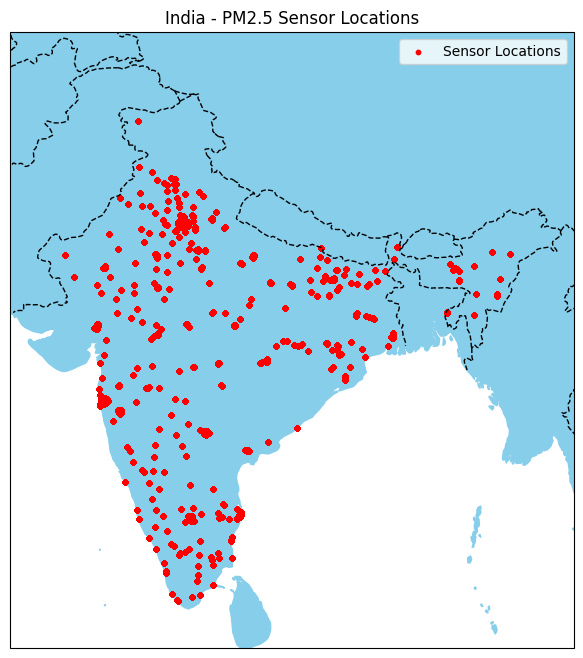

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data_file_path = "/content/drive/MyDrive/Data.csv"
data_df = pd.read_csv(data_file_path)
data_df.rename(columns={"Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

sensor_locations = data_df.dropna(subset=["latitude", "longitude"])
fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=1)
ax.add_feature(cfeature.LAND, color="skyblue")
ax.set_extent([68, 98, 6, 38])

plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensor Locations", transform=ccrs.PlateCarree())
plt.title("India - PM2.5 Sensor Locations")

plt.legend()
plt.show()

#Tell us something new [1 Mark]

Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

####Improving Air Quality Trends Over Time

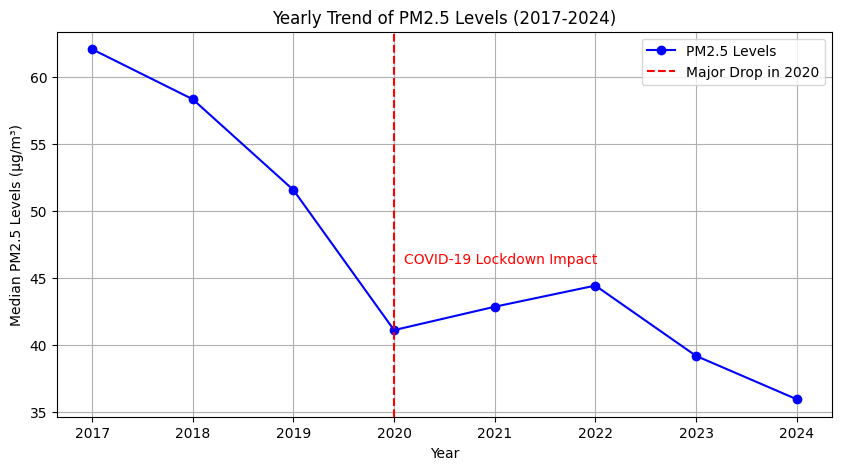

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Data.csv"
df = pd.read_csv(file_path)

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df["Year"] = df["Timestamp"].dt.year
yearly_pm25_trend = df.groupby("Year")["PM2.5"].median()

plt.figure(figsize=(10, 5))
plt.plot(yearly_pm25_trend.index, yearly_pm25_trend.values, marker='o', linestyle='-', color='b', label="PM2.5 Levels")

plt.axvline(x=2020, color='r', linestyle='--', label="Major Drop in 2020")
plt.text(2020.1, yearly_pm25_trend[2020] + 5, "COVID-19 Lockdown Impact", color='r')
plt.xlabel("Year")
plt.ylabel("Median PM2.5 Levels (µg/m³)")
plt.title("Yearly Trend of PM2.5 Levels (2017-2024)")

plt.legend()
plt.grid(True)
plt.show()


The trend of PM2.5 levels between 2017 and 2024 shows a sharp decline in 2020, during the COVID-19 lockdown, when there was less industrial activity, fewer vehicle emissions, and purer air. This proves that human activities are the primary cause of air pollution and that short-term curbs can have a direct beneficial effect. But since 2020, pollution levels have increased gradually as economic activities resumed, although they are still below pre-2020 levels. There is a general declining trend in air pollution, which could be attributed to enhanced environmental policies, more stringent regulations, and more efficient emission control technologies. These results call for long-term sustainable air pollution controls, e.g., low-emission zones, increased public transport, and more stringent industrial controls to sustain and improve further the quality of the air in the city.